In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
import tensorflow as tf

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows',None)

In [3]:
# loading the Dataset

df = pd.read_excel("Usedcars.xlsx", sheet_name = 0,engine='openpyxl') 
df.head(2)

,Unnamed: 0,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,city
0,0,['Nexon'],['Tata'],XZA Plus (O) AMT,['2020'],"25,925 kms",Petrol,automatic,"12,00,000",Bangalore
1,1,['i20'],['Hyundai'],1.2 Spotz,['2017'],"48,151 kms",Petrol,manual,"6,51,500",Bangalore


In [4]:
df.columns    # checking the variables in column section.

Index(['Unnamed: 0', 'Model', 'Brand', 'Variant', 'Manufacturing_year', 'Driven_km', 'Fuel_type', 'Transmission', 'Selling_Price', 'city'], dtype='object')

### Dataframe Description:
    1. Model : A car's make is the brand of the vehicle, while the model refers to the name of a car product and sometimes                    a range of products.
    2. Brand : A type of product manufactured by a particular company under a particular name.
    3. Variant : Manufacturer, at his option may designate a version as a variant.
    4. Manufacturing year :  The Production market classifies years to specific vehicles, and model codes in place of the                                     model year.
    5. Diven Km  : The car is driven for particular distance.
    6. Fuel Type : Types of fuel is used for particular car.
    7. Transmission : the mechanism by which power is transmitted from an engine to the axle in a motor vehicle.
    8. Selling price : The car is quoted for particular price to sell it.
    9. Location : A particular place or position where car is sold.

# Statistical analysis

In [5]:
df.describe(include='all')

,Unnamed: 0,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,city
count,5747.000000,5747,5747,5747,5747,5747,5747,5747,5747,5747
unique,NaN,258,33,1609,26,2522,4,2,1403,4
top,NaN,['Swift'],['Maruti'],VXI,['2016'],"80,000 kms",Petrol,manual,"4,50,000",Delhi
freq,NaN,287,1598,211,710,130,3250,4276,82,2820
mean,1000.042979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,767.148493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,359.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,792.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1507.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. no null values present in the dataset
2. outliers are present as their is difference between the mean and 50 percentile data
3. Eventhough selling price is a numerical values, there are similar values as total number of rows is 5747 but their is only 1403 unique values showing the repetition of the same price
4. Many of the data that should be in numerical format is in categorical format which would be needed to be converted

In [6]:
df.info()  #Checking the information of  data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5747 non-null   int64 
 1   Model               5747 non-null   object
 2   Brand               5747 non-null   object
 3   Variant             5747 non-null   object
 4   Manufacturing_year  5747 non-null   object
 5   Driven_km           5747 non-null   object
 6   Fuel_type           5747 non-null   object
 7   Transmission        5747 non-null   object
 8   Selling_Price       5747 non-null   object
 9   city                5747 non-null   object
dtypes: int64(1), object(9)
memory usage: 449.1+ KB


In [7]:
df.shape #checking the data dimension

(5747, 10)

The dataset has 10 columns and 5747 rows

There are 5746 datas available

# Feature engineering

**1.renaming**

In [8]:
col1=["Model","Brand","Manufacturing_year"]

for col in col1:
    print("unique value of" ,col1, "is")
    print(df[col].unique())
    print("\n")

unique value of ['Model', 'Brand', 'Manufacturing_year'] is
["['Nexon']" "['i20']" "['Verna']" "['XUV500']" "['Baleno']"
 "['Hector', 'Plus']" "['Ameo']" "['Grand', 'i10']" "['Creta']"
 "['TUV', '300']" "['Amaze']" "['City']" "['Vento']" "['E-Class']"
 "['Fortuner']" "['X1']" "['KWID']" "['Polo']" "['i10']" "['Terrano']"
 "['Altroz']" "['Sonet']" "['Jazz']" "['Swift', 'Dzire']" "['Magnite']"
 "['Swift']" "['Duster']" "['Ertiga']" "['Venue']" "['EON']" "['Figo']"
 "['RediGO']" "['Celerio']" "['Sunny']" "['Eeco']" "['Yaris']"
 "['Wagon', 'R']" "['Ciaz']" "['Vitara', 'Brezza']" "['XL6']"
 "['Marazzo']" "['Alto', 'K10']" "['Alto', '800']" "['Ignis']"
 "['Santro']" "['Brio']" "['Nano']" "['Ritz']" "['XUV300']" "['Tiago']"
 "['Harrier']" "['Etios']" "['Xcent']" "['Hector']" "['Santro', 'Xing']"
 "['Alto']" "['Rapid']" "['Figo', 'Aspire']" "['Triber']" "['WR-V']"
 "['Grand', 'i10', 'Nios']" "['i20', 'Active']" "['S-Presso']"
 "['Micra', 'Active']" "['Ecosport']" "['GLA', 'Class']" "['X5']"
 "

In [9]:
df["Manufacturing_year"].replace(["['2020']", "['2017']" ,"['2013']" ,"['2016']" ,"['2019']" ,"['2015']"
 ,"['2018']" ,"['2011']" ,"['2014']" ,"['2010']", "['2021']", "['2012']"
 ,"['2009']" ,"['2008']" ,"['2007']", "['2005']" ,"['2006']" ,"['2001']",
 "['2000']", "['2002']" ,"['2003']", "['2004']" ,"['1989']" ,"['1981']",
 "['1995']" ,"['1998']"],
[2020,2017,2013,2016,2019,2015,2018,2011,2014,2010,2021,2012,2009,2008,2007,2005,2006,2001,2000,2002,2003,2004,1989,1981,1995,1998],inplace=True)

In [10]:
df["Manufacturing_year"].unique()

array([2020, 2017, 2013, 2016, 2019, 2015, 2018, 2011, 2014, 2010, 2021,
       2012, 2009, 2008, 2007, 2005, 2006, 2001, 2000, 2002, 2003, 2004,
       1989, 1981, 1995, 1998], dtype=int64)

Not renaming others as anyways it would be encoded

**2. add features in dataset:**

a.  Add current year

b.  Old of the car

In [11]:
df["Current Year"] = 2021
df.head()

,Unnamed: 0,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,city,Current Year
0,0,['Nexon'],['Tata'],XZA Plus (O) AMT,2020,"25,925 kms",Petrol,automatic,"12,00,000",Bangalore,2021
1,1,['i20'],['Hyundai'],1.2 Spotz,2017,"48,151 kms",Petrol,manual,"6,51,500",Bangalore,2021
2,2,['Verna'],['Hyundai'],1.6 SX VTVT,2013,"30,005 kms",Petrol,manual,"6,20,000",Bangalore,2021
3,3,['XUV500'],['Mahindra'],R W10 FWD,2016,"49,943 kms",Diesel,manual,"13,99,000",Bangalore,2021
4,4,['Baleno'],['Maruti'],Zeta,2019,"15,341 kms",Petrol,manual,"7,92,500",Bangalore,2021


In [12]:
df["no_of_year"] = df["Current Year"] - df["Manufacturing_year"]
df.head(2)

,Unnamed: 0,Model,Brand,Variant,Manufacturing_year,Driven_km,Fuel_type,Transmission,Selling_Price,city,Current Year,no_of_year
0,0,['Nexon'],['Tata'],XZA Plus (O) AMT,2020,"25,925 kms",Petrol,automatic,"12,00,000",Bangalore,2021,1
1,1,['i20'],['Hyundai'],1.2 Spotz,2017,"48,151 kms",Petrol,manual,"6,51,500",Bangalore,2021,4


**3. Dropping the uncessary column as age of the column is known-dropping current year and manufacturing year**

In [13]:
df.drop(["Manufacturing_year","Current Year"],axis = 1, inplace = True)
df.head(2)

,Unnamed: 0,Model,Brand,Variant,Driven_km,Fuel_type,Transmission,Selling_Price,city,no_of_year
0,0,['Nexon'],['Tata'],XZA Plus (O) AMT,"25,925 kms",Petrol,automatic,"12,00,000",Bangalore,1
1,1,['i20'],['Hyundai'],1.2 Spotz,"48,151 kms",Petrol,manual,"6,51,500",Bangalore,4


**4.converting strings of necessary columns to numerical columns**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5747 non-null   int64 
 1   Model          5747 non-null   object
 2   Brand          5747 non-null   object
 3   Variant        5747 non-null   object
 4   Driven_km      5747 non-null   object
 5   Fuel_type      5747 non-null   object
 6   Transmission   5747 non-null   object
 7   Selling_Price  5747 non-null   object
 8   city           5747 non-null   object
 9   no_of_year     5747 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 449.1+ KB


In [15]:
#remove the , and convert it to int64
df["Driven_km"]=df["Driven_km"].str.replace(",","")
df["Driven_km"]=df["Driven_km"].str.replace(" kms","")
df["Driven_km"]=df["Driven_km"].astype('int64') 

In [16]:
#Selling_Price
df["Selling_Price"]=df["Selling_Price"].str.replace(",","")
df["Selling_Price"]=df["Selling_Price"].astype('int64') 

In [17]:
#Dropping unnamed column as it if of no use
df.drop(columns=["Unnamed: 0"],inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5747 entries, 0 to 5746
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          5747 non-null   object
 1   Brand          5747 non-null   object
 2   Variant        5747 non-null   object
 3   Driven_km      5747 non-null   int64 
 4   Fuel_type      5747 non-null   object
 5   Transmission   5747 non-null   object
 6   Selling_Price  5747 non-null   int64 
 7   city           5747 non-null   object
 8   no_of_year     5747 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 404.2+ KB


# Graphical Data visualization and analysis

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x='city', y='Selling_Price', data=df, ci=None)

Highest prices for cars are seen in Delhi

**Delhi>Bangalore>Ahmedabad>Chennai**

In [ ]:
def generate_countplot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

generate_countplot(df['Fuel_type'])
generate_countplot(df['Transmission'])
generate_countplot(df['city'])

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x='no_of_year', y='Selling_Price', hue='city', data=df, ci=None)

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x='no_of_year', y='Selling_Price', hue='Fuel_type', data=df, ci=None)

In [ ]:
df.describe(include='all')

In [ ]:
# make list with top 10 variables
top_10 = [x for x in df.Brand.value_counts().sort_values(ascending=False).head(10).index]
print(top_10)

In [ ]:
#creating a dataframe with Brand as index
df_new=df.set_index('Brand')

#retrieving the rows alone which has index as the top 10 brands
rows_brand = df_new.loc[["['Maruti']", "['Hyundai']","['Honda']","['Toyota']","['Mahindra']","['Volkswagen']","['Mercedes-Benz']","['Renault']","['Tata']"]]

In [ ]:

plt.figure(figsize=(15,8))
sns.lineplot(x='Brand', y='Selling_Price', hue='city', data=rows_brand, ci=None)
    

In [ ]:
x =df["Driven_km"] 
y =df["Selling_Price"]

plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Driven_km')
plt.ylabel('Selling_Price')
plt.show()



In [ ]:
plt.style.use('seaborn-dark-palette')
df.hist(figsize=(15,15))
plt.show()

# ENCODING

In [19]:
from sklearn.preprocessing import OrdinalEncoder

#Dealing with categorical data
oe=OrdinalEncoder()
def ordinal_encoder(df, col):
    df[col]=oe.fit_transform(df[col])
    return df

df=ordinal_encoder(df,['Model', 'Brand', 'Variant', 'Driven_km', 'Fuel_type','Transmission','Selling_Price','city','no_of_year'])
df.head(2)

,Model,Brand,Variant,Driven_km,Fuel_type,Transmission,Selling_Price,city,no_of_year
0,146.0,29.0,1490.0,508.0,3.0,0.0,1062.0,1.0,1.0
1,256.0,10.0,111.0,1116.0,3.0,1.0,778.0,1.0,4.0


# Exploratory data Analysis

1.Dropping duplicates

In [20]:
print("before dropping duplicates, size of df is",len(df))
df.drop_duplicates(inplace=True)
print("after dropping duplicates, size of df is",len(df))

before dropping duplicates, size of df is 5747
after dropping duplicates, size of df is 5425


2.Dealing with null values

In [21]:
#Check the null values in dataset
df.isnull().sum()

Model            0
Brand            0
Variant          0
Driven_km        0
Fuel_type        0
Transmission     0
Selling_Price    0
city             0
no_of_year       0
dtype: int64

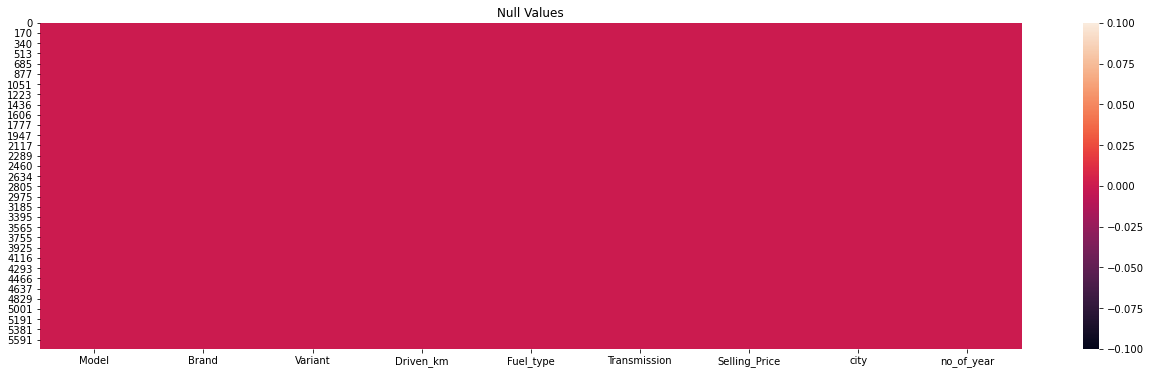

In [22]:
# Heatmap for Null value for data.
plt.figure(figsize=[22,6])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

<AxesSubplot:>

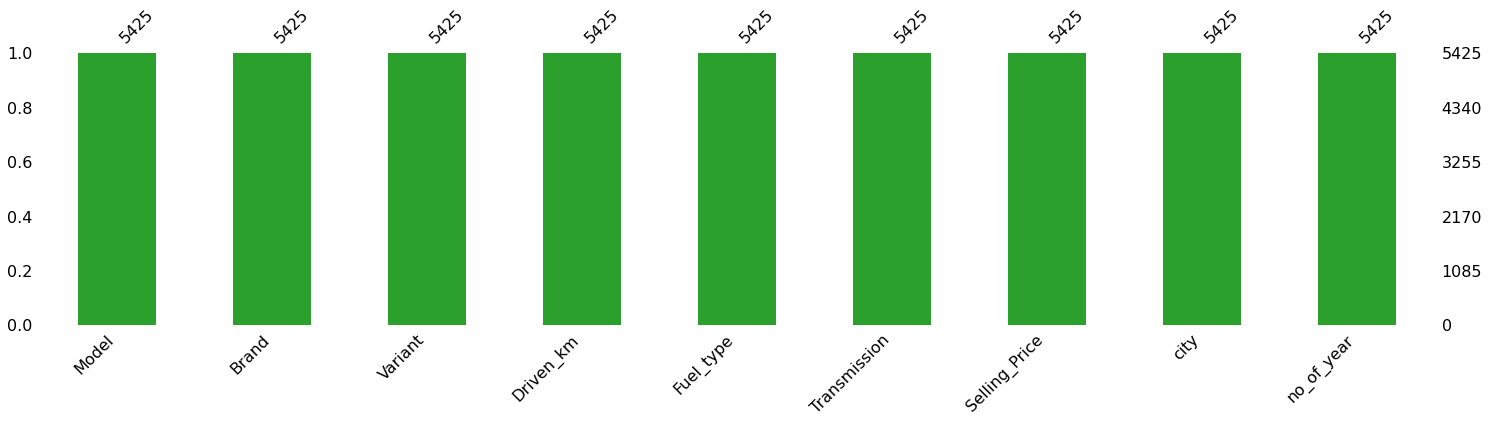

In [23]:
import missingno
missingno.bar(df, figsize = (25,5), color="tab:green")

3. Checking and dealing with outliers

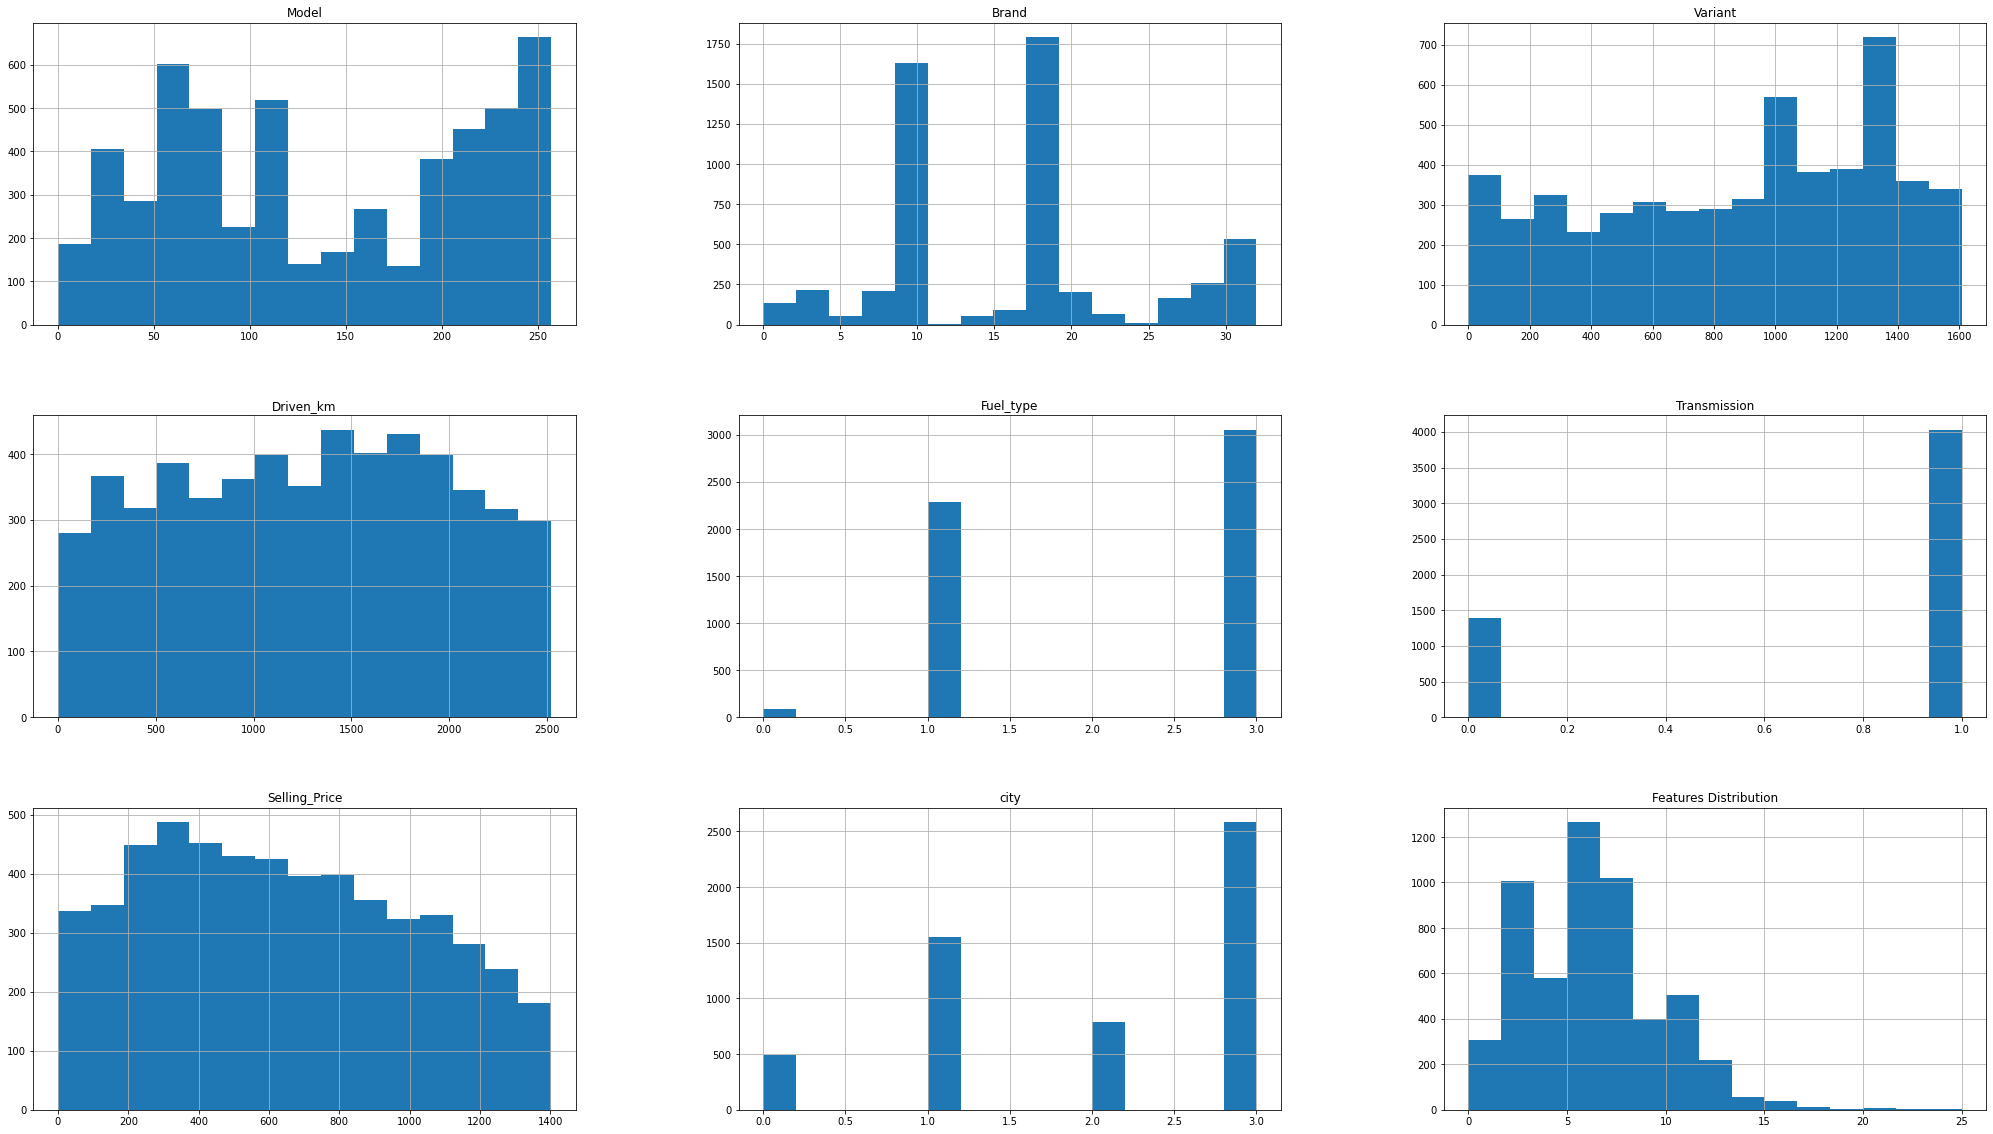

In [24]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [25]:
df.describe()

,Model,Brand,Variant,Driven_km,Fuel_type,Transmission,Selling_Price,city,no_of_year
count,5425.000000,5425.000000,5425.000000,5425.000000,5425.000000,5425.000000,5425.000000,5425.000000,5425.000000
mean,135.176959,16.323687,882.579171,1274.642212,2.111152,0.743226,635.867834,2.006820,6.109677
std,80.068541,7.906949,463.958885,694.460558,1.016999,0.436894,372.065659,1.062115,3.339883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,10.000000,499.000000,678.000000,1.000000,0.000000,325.000000,1.000000,4.000000
50%,119.000000,19.000000,986.000000,1310.000000,3.000000,1.000000,614.000000,2.000000,6.000000
75%,206.000000,19.000000,1316.000000,1851.000000,3.000000,1.000000,932.000000,3.000000,8.000000
max,257.000000,32.000000,1608.000000,2521.000000,3.000000,1.000000,1402.000000,3.000000,25.000000


Outliers are not present.
However if it was present, we could have used in the particular features
1. Zscore
2. Clipping
3. Using percentile/quantile

**4. dealing with skewness/Obtaining a gaussian distribution**

**Checking if the distribution is normalisation through**
1. Skew values
2. Box plot
3. Kolmogorov Smirnov test
4. Histogram

In [26]:
df.skew()

Model            0.061957
Brand            0.246664
Variant         -0.327831
Driven_km       -0.056851
Fuel_type       -0.313003
Transmission    -1.113842
Selling_Price    0.198725
city            -0.470751
no_of_year       0.647166
dtype: float64

There is little skewness in data in Transmission and no_of_year

<AxesSubplot:>

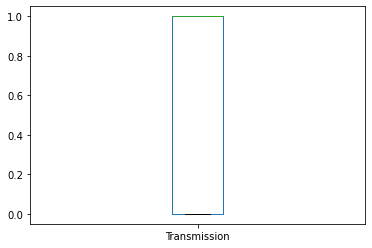

In [27]:
df["Transmission"].plot(kind = 'box')

In [28]:
from scipy.stats import kstest, norm
ks_statistic, p_value = kstest(df["Transmission"], 'norm')
print(ks_statistic, p_value)

0.5845705525201559 0.0


If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0
But since its 0.5, shows that there is need for normalisation

<AxesSubplot:>

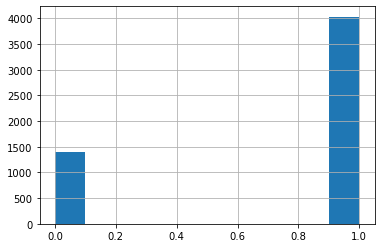

In [29]:
df["Transmission"].hist()

In [30]:
# Splitting the indepedent and target variable in x and y
x= df.drop('Selling_Price',axis=1)
y= df['Selling_Price']

In [31]:
x.head(2)

,Model,Brand,Variant,Driven_km,Fuel_type,Transmission,city,no_of_year
0,146.0,29.0,1490.0,508.0,3.0,0.0,1.0,1.0
1,256.0,10.0,111.0,1116.0,3.0,1.0,1.0,4.0


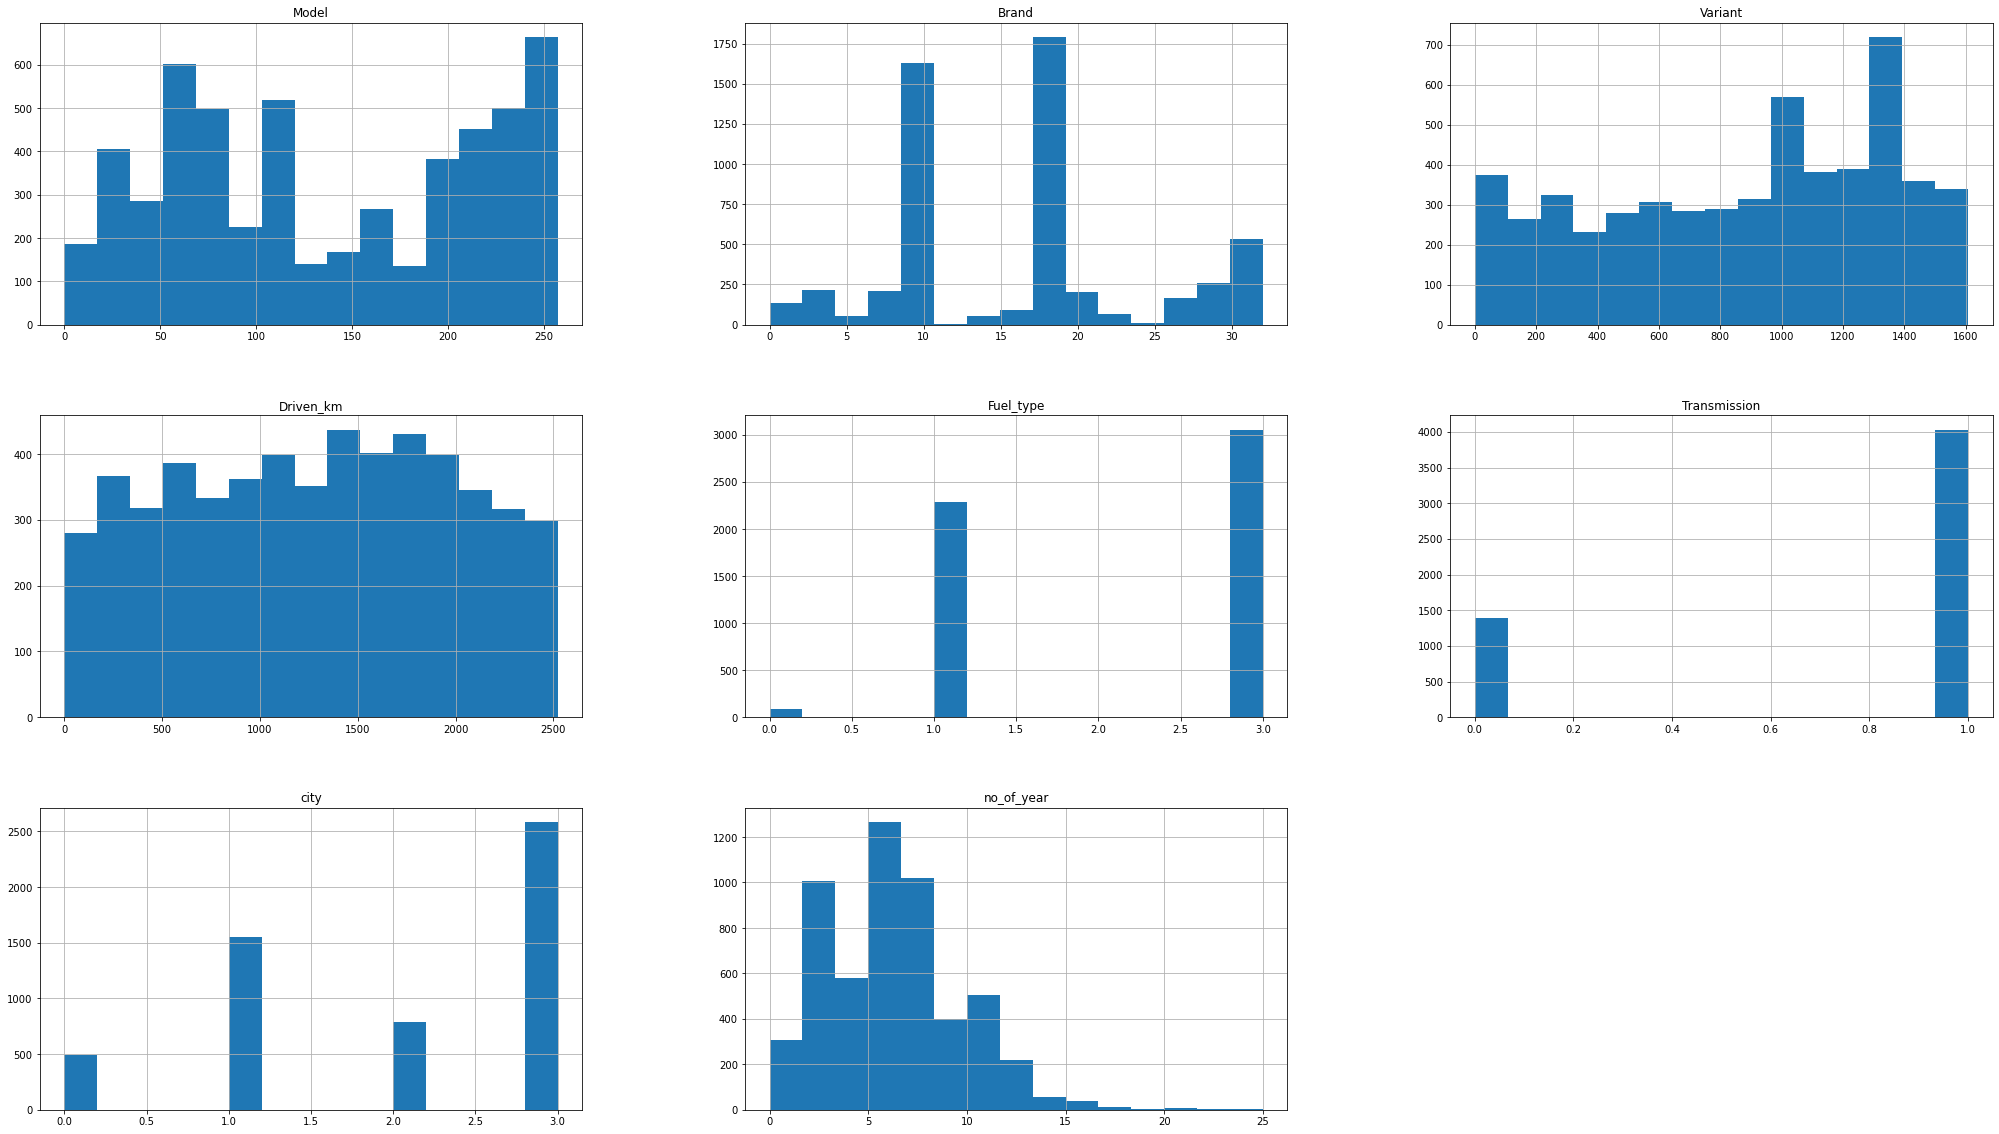

In [32]:
#checking for outliers
x.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

# FEATURE SELECTION

conditions for regression

1. No multicollinearity
2. No autocorrelation
3. Normal distribution data



**1.CHECKING MULICOLLINARITY**

**a.Comparing features with features uding HeatMap-Pearsons correlation**

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

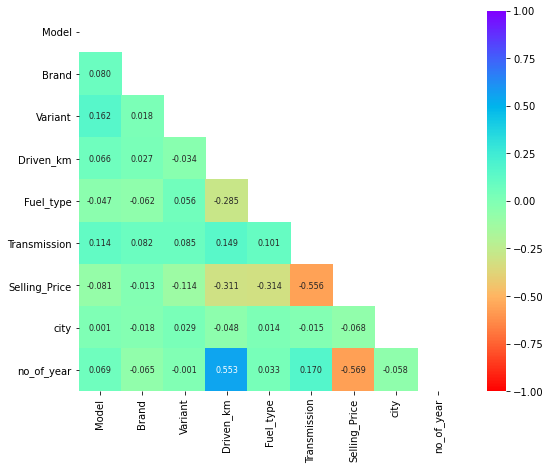

In [33]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**b.Variance inflation factor**

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

        feature       VIF
0         Model  3.847097
1         Brand  4.510946
2       Variant  4.388539
3     Driven_km  6.537838
4     Fuel_type  4.768966
5  Transmission  4.143305
6          city  3.884380
7    no_of_year  6.693855


0-5: no chance of mulitcollinarity

5-10:less chance of multicollinarity

10 and above:very hight chance

Hence Driven_km and no_of_year shows some amount of multicollinearity

**2.Comparing features with label**

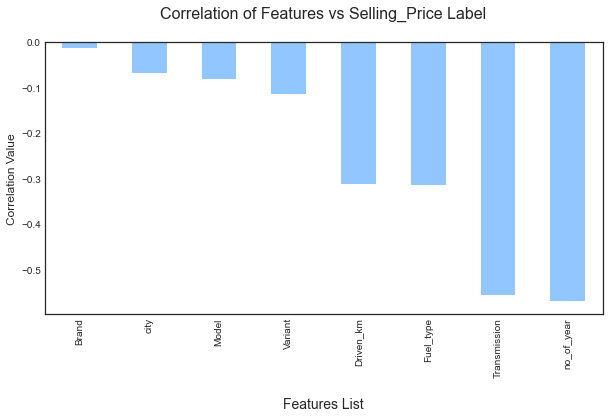

In [35]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Selling_Price'].sort_values(ascending=False).drop('Selling_Price').plot.bar()
plt.title("Correlation of Features vs Selling_Price Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

**3. Feature selection using Lasso regression**

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3)

search.fit(x,y)

search.best_params_

coefficients = search.best_estimator_.named_steps['model'].coef_

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .............model__alpha=0.1;, score=-56259.495 total time=   0.0s
[CV 2/5] END .............model__alpha=0.1;, score=-55753.407 total time=   0.0s
[CV 3/5] END .............model__alpha=0.1;, score=-48295.242 total time=   0.0s
[CV 4/5] END .............model__alpha=0.1;, score=-55598.295 total time=   0.0s
[CV 5/5] END .............model__alpha=0.1;, score=-55673.488 total time=   0.0s
[CV 1/5] END .............model__alpha=0.2;, score=-56247.830 total time=   0.0s
[CV 2/5] END .............model__alpha=0.2;, score=-55728.272 total time=   0.0s
[CV 3/5] END .............model__alpha=0.2;, score=-48306.082 total time=   0.0s
[CV 4/5] END .............model__alpha=0.2;, score=-55603.356 total time=   0.0s
[CV 5/5] END .............model__alpha=0.2;, score=-55674.167 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-56236.272 total time=   0.0s
[CV 2/5] END model__alpha=0.3000000000000000

[CV 4/5] END .............model__alpha=2.7;, score=-55776.695 total time=   0.0s
[CV 5/5] END .............model__alpha=2.7;, score=-55749.233 total time=   0.0s
[CV 1/5] END model__alpha=2.8000000000000003;, score=-55994.808 total time=   0.0s
[CV 2/5] END model__alpha=2.8000000000000003;, score=-55143.631 total time=   0.0s
[CV 3/5] END model__alpha=2.8000000000000003;, score=-48633.642 total time=   0.0s
[CV 4/5] END model__alpha=2.8000000000000003;, score=-55785.502 total time=   0.0s
[CV 5/5] END model__alpha=2.8000000000000003;, score=-55754.560 total time=   0.0s
[CV 1/5] END model__alpha=2.9000000000000004;, score=-55987.890 total time=   0.0s
[CV 2/5] END model__alpha=2.9000000000000004;, score=-55124.342 total time=   0.0s
[CV 3/5] END model__alpha=2.9000000000000004;, score=-48647.999 total time=   0.0s
[CV 4/5] END model__alpha=2.9000000000000004;, score=-55794.453 total time=   0.0s
[CV 5/5] END model__alpha=2.9000000000000004;, score=-55760.065 total time=   0.0s
[CV 1/5]

[CV 1/5] END .............model__alpha=5.4;, score=-55849.678 total time=   0.0s
[CV 2/5] END .............model__alpha=5.4;, score=-54729.971 total time=   0.0s
[CV 3/5] END .............model__alpha=5.4;, score=-48970.066 total time=   0.0s
[CV 4/5] END .............model__alpha=5.4;, score=-56103.387 total time=   0.0s
[CV 5/5] END .............model__alpha=5.4;, score=-56002.166 total time=   0.0s
[CV 1/5] END .............model__alpha=5.5;, score=-55845.539 total time=   0.0s
[CV 2/5] END .............model__alpha=5.5;, score=-54717.710 total time=   0.0s
[CV 3/5] END .............model__alpha=5.5;, score=-48984.782 total time=   0.0s
[CV 4/5] END .............model__alpha=5.5;, score=-56120.544 total time=   0.0s
[CV 5/5] END .............model__alpha=5.5;, score=-56014.003 total time=   0.0s
[CV 1/5] END .............model__alpha=5.6;, score=-55841.508 total time=   0.0s
[CV 2/5] END .............model__alpha=5.6;, score=-54705.720 total time=   0.0s
[CV 3/5] END .............mo

[CV 5/5] END .............model__alpha=7.8;, score=-56320.869 total time=   0.0s
[CV 1/5] END .............model__alpha=7.9;, score=-55778.303 total time=   0.0s
[CV 2/5] END .............model__alpha=7.9;, score=-54504.532 total time=   0.0s
[CV 3/5] END .............model__alpha=7.9;, score=-49369.484 total time=   0.0s
[CV 4/5] END .............model__alpha=7.9;, score=-56550.534 total time=   0.0s
[CV 5/5] END .............model__alpha=7.9;, score=-56334.097 total time=   0.0s
[CV 1/5] END .............model__alpha=8.0;, score=-55776.838 total time=   0.0s
[CV 2/5] END .............model__alpha=8.0;, score=-54499.028 total time=   0.0s
[CV 3/5] END .............model__alpha=8.0;, score=-49386.826 total time=   0.0s
[CV 4/5] END .............model__alpha=8.0;, score=-56568.427 total time=   0.0s
[CV 5/5] END .............model__alpha=8.0;, score=-56347.441 total time=   0.0s
[CV 1/5] END .............model__alpha=8.1;, score=-55775.480 total time=   0.0s
[CV 2/5] END .............mo

In [37]:
importance = np.abs(coefficients)

In [38]:
print("array of important in features",importance)

array of important in features [  0.           5.5062148   20.66928969  28.90886492  99.78558279
 160.30484299  33.94212516 165.07999901]


the first feature is discarded by lasso regression

# Discarding  Brand feature after Feature selection

In [39]:
x=x.drop(["Brand"],axis=1)
x.head(2)

,Model,Variant,Driven_km,Fuel_type,Transmission,city,no_of_year
0,146.0,1490.0,508.0,3.0,0.0,1.0,1.0
1,256.0,111.0,1116.0,3.0,1.0,1.0,4.0


# Checking autocorrelation

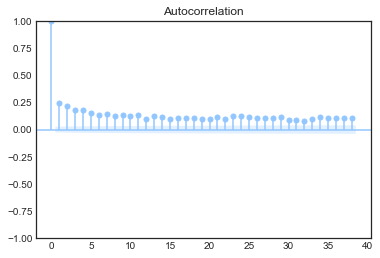

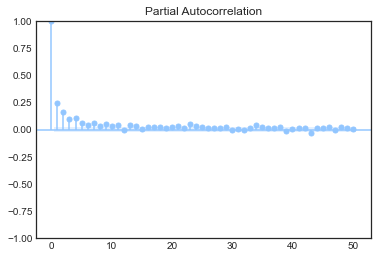

1.5024116407684809

In [40]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
  
    
  
# Plot the autocorrelation for selling price data with 0.05 significance level
plot_acf(df['Selling_Price'], alpha =0.05)
plt.show()
  
# Plot the partial autocorrelation for stock price data with 
# 0.05 significance level
plot_pacf(df['Selling_Price'], alpha =0.05, lags=50)
plt.show()
  
"""
Code for Durbin Watson test
"""
dwt = pd.DataFrame(df['Selling_Price'],columns=['Selling_Price'])
  
X_dwt =np.arange(len(dwt[['Selling_Price']]))
Y_dwt = np.asarray(dwt[['Selling_Price']])
X_dwt = sm.add_constant(X_dwt)
  
# Fit the ordinary least square method.
ols_res = OLS(Y_dwt,X_dwt).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

Since the d value is below 2, the Null hypothesis is not rejected. Hence **First order auto correlation does not exist**

# Checking Homoscedasticity of dataset

The residuals should have equal variance for linear regression

This can be found out by
1. Whites test
2. Scatter plot
3. Goldfeld Quant Test

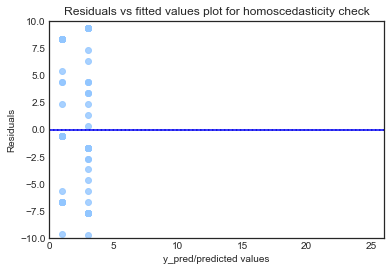

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0,test_size=0.25)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import seaborn as sns

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

p = sns.residplot(x["Fuel_type"],y)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [42]:
#Goldfeld Quandt Test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
residuals = y_train-y_pred
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.0885885883716135), ('p-value', 0.028049534020465214)]

Since p value is less than 0.05 in Goldfeld Quandt Test, we can reject it's null hypothesis(that is reject that error terms are homoscedastic)

In [43]:
residuals = y_train-y_pred
residuals=residuals.tolist()

In [44]:
# Bartlett’s test 
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


from scipy.stats import bartlett
test = bartlett(residuals,y_pred)
print(test)

BartlettResult(statistic=267.29618370894633, pvalue=4.407628955627215e-60)


# Power transform of dataset to bring Homeoscedasticity to dataset


#power transform features
from sklearn.preprocessing import power_transform
X_new=power_transform(x)
X_new=pd.DataFrame(X_new,columns=x.columns)
x=X_new

# Checking error terms

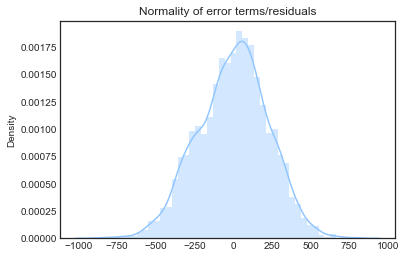

In [45]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data

# Standardisation

Standardising only the numerical features and not the encoded features as would mean assigning a distribution to categorical features which shouldnt be done

In [46]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler


# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Driven_km','no_of_year']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

After standardisation the data will have zero mean and unit standard deviation

In [47]:
x_train=pd.DataFrame(x)
print("before standardisation\n",x_train.head(2))

print("\n")

x_train_stand=pd.DataFrame(X_train_stand)
print("after standardisation\n",x_train_stand.head(2))


before standardisation
    Model  Variant  Driven_km  Fuel_type  Transmission  city  no_of_year
0  146.0   1490.0      508.0        3.0           0.0   1.0         1.0
1  256.0    111.0     1116.0        3.0           1.0   1.0         4.0


after standardisation
       Model  Variant  Driven_km  Fuel_type  Transmission  city  no_of_year
4985  157.0    837.0   0.963344        1.0           1.0   3.0    0.871385
1698   60.0    180.0  -1.695894        3.0           0.0   0.0   -1.224532


x=pd.concat([X_train_stand,X_test_stand],axis=0)

# Splitting data into train, test and validation data

# MODEL BUILDING

In [48]:
#Importing Libraries for Metrics and Model buiding

from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV


#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

**a.Finding the best random state**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.6283985193154197 on Random State 199


A low R-squared value indicates that your independent variable is not explaining much in the variation of your dependent variable - regardless of the variable significance, this is letting you know that the identified independent variable, even though significant, is not accounting for much of the mean of your dependent variable

**b.splitting the data**

In [50]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(x,y, train_size=0.8,random_state=199)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [51]:
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(4340, 7)
(4340,)
(542, 7)
(542,)
(543, 7)
(543,)


(None, None)

# Testing various models

In [52]:
LR=LinearRegression()
RR=Ridge(alpha=1e-2, normalize=True)
LasR=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
DTR=DecisionTreeRegressor(criterion="poisson", random_state=111)
RFR=RandomForestRegressor(max_depth=2, max_features="sqrt")
KNR=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
GBR=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
ABR=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
ETR=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
XGBR=XGBRegressor()
LGBR=LGBMRegressor()


models= []
models.append(('LinearRegression', LR))
models.append(('Ridge Regressor', RR))
models.append(('Lasso Regressor', LasR))
#models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('KNeighborsRegressor',KNR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('XGBRegressor',XGBR))
models.append(('LGBMRegressor',LGBR))

In [53]:
Model= []
score= []
cvs=[]
difference=[]
RMSE=[]


****************************************** LinearRegression ********************************************************


LinearRegression()


R2 Score is: 59.15958260859815


Cross Validation Score: 61.57214364851845


R2 Score - Cross Validation Score is -2.4125610399202984
RMSE Score is: 234.9570986203105


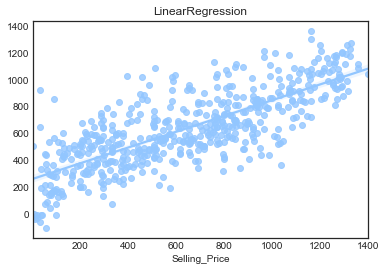

****************************************** Ridge Regressor ********************************************************


Ridge(alpha=0.01, normalize=True)


R2 Score is: 59.13247364903413


Cross Validation Score: 61.59302265432185


R2 Score - Cross Validation Score is -2.4605490052877173
RMSE Score is: 235.03506532914548


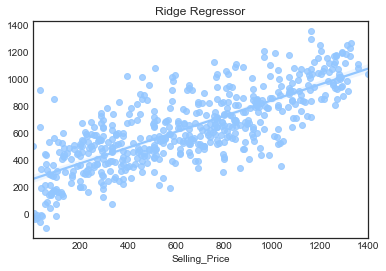

****************************************** Lasso Regressor ********************************************************


Lasso(alpha=0.01, max_iter=100000.0, normalize=True)


R2 Score is: 59.182168067762596


Cross Validation Score: 61.57882320147746


R2 Score - Cross Validation Score is -2.396655133714866
RMSE Score is: 234.89212196041564


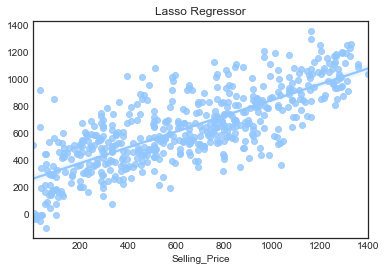

****************************************** DecisionTreeRegressor ********************************************************


DecisionTreeRegressor(criterion='poisson', random_state=111)


R2 Score is: 63.749954864717154


Cross Validation Score: 35.234209372073224


R2 Score - Cross Validation Score is 28.51574549264393
RMSE Score is: 221.3592937386943


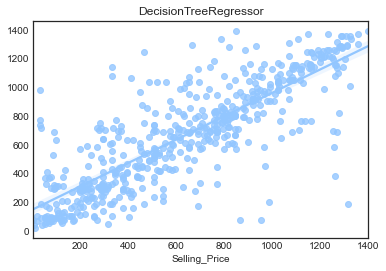

****************************************** RandomForestRegressor ********************************************************


RandomForestRegressor(max_depth=2, max_features='sqrt')


R2 Score is: 47.15973517645216


Cross Validation Score: 48.27776971448804


R2 Score - Cross Validation Score is -1.1180345380358787
RMSE Score is: 267.25508515543413


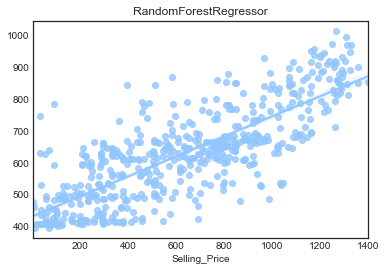

****************************************** KNeighborsRegressor ********************************************************


KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)


R2 Score is: 30.904908086971506


Cross Validation Score: 4.776211850495939


R2 Score - Cross Validation Score is 26.128696236475566
RMSE Score is: 305.60966449867186


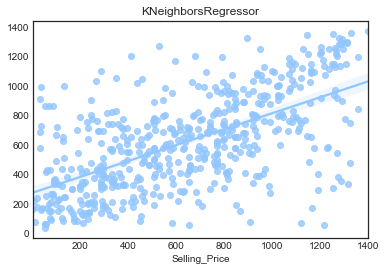

****************************************** GradientBoostingRegressor ********************************************************


GradientBoostingRegressor(loss='quantile', max_depth=5, n_estimators=200)


R2 Score is: 53.68234852101843


Cross Validation Score: 40.19937352099735


R2 Score - Cross Validation Score is 13.482975000021085
RMSE Score is: 250.21696379037127


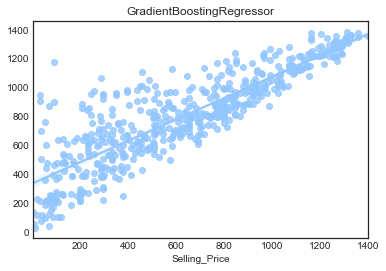

****************************************** AdaBoostRegressor ********************************************************


AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42)


R2 Score is: 59.25689692612778


Cross Validation Score: 61.40102772096796


R2 Score - Cross Validation Score is -2.14413079484018
RMSE Score is: 234.6770044406048


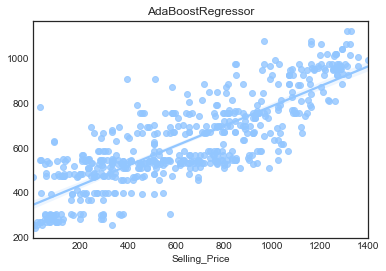

****************************************** ExtraTreesRegressor ********************************************************


ExtraTreesRegressor(max_features='sqrt', n_estimators=200, n_jobs=6)


R2 Score is: 88.02758461067798


Cross Validation Score: 75.59298037176264


R2 Score - Cross Validation Score is 12.434604238915341
RMSE Score is: 127.21384314935051


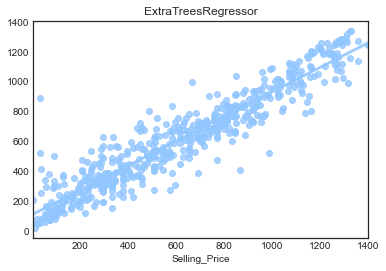

****************************************** XGBRegressor ********************************************************


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


R2 Score is: 92.36847735890666


Cross Validation Score: 76.0702925890841


R2 Score - Cross Validation Score is 16.298184769822555
RMSE Score is: 101.56617173054622


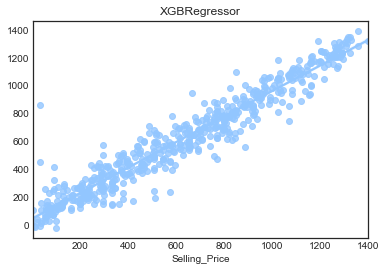

****************************************** LGBMRegressor ********************************************************


LGBMRegressor()


R2 Score is: 91.85074805003902


Cross Validation Score: 75.39399000491669


R2 Score - Cross Validation Score is 16.456758045122328
RMSE Score is: 104.9548125218316


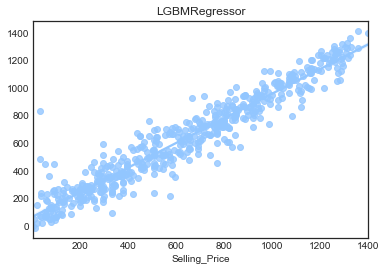

In [54]:
for name,model in models:
    print('******************************************',name,'********************************************************')
    
    print('\n')
    Model.append(name)
    
    # Training the model
    model.fit(X_train, Y_train) #computer learing
    
    print(model)
    
     # Predicting Y_test
    pred = model.predict(X_test)  #testing
    
    print('\n') 
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    score.append(r2)
    print('\n')
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,X_valid,Y_valid, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    cvs.append(cv_score)
    print('\n')
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    difference.append(result)
    
     # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    RMSE.append(rmse)
    
    #plots created
    sns.regplot(Y_test,pred)
    plt.title(name)
    plt.show()

In [55]:
result = pd.DataFrame({'Model': Model, 'r2score': score,'Cross_val_score': cvs,'RMSE score':RMSE,'Difference between cv score and cross_val score':difference})
result

,Model,r2score,Cross_val_score,RMSE score,Difference between cv score and cross_val score
0,LinearRegression,59.159583,61.572144,234.957099,-2.412561
1,Ridge Regressor,59.132474,61.593023,235.035065,-2.460549
2,Lasso Regressor,59.182168,61.578823,234.892122,-2.396655
3,DecisionTreeRegressor,63.749955,35.234209,221.359294,28.515745
4,RandomForestRegressor,47.159735,48.277770,267.255085,-1.118035
5,KNeighborsRegressor,30.904908,4.776212,305.609664,26.128696
6,GradientBoostingRegressor,53.682349,40.199374,250.216964,13.482975
7,AdaBoostRegressor,59.256897,61.401028,234.677004,-2.144131
8,ExtraTreesRegressor,88.027585,75.592980,127.213843,12.434604
9,XGBRegressor,92.368477,76.070293,101.566172,16.298185


# Hyperparameter tuning of XGB Regressor

In [59]:
# Choosing XGB Regressor

fmod_param = {'booster' : ['gbtree','dart','gblinear'],
              'importance_type' : ['gain','split'],
              'n_estimators' : [100,200,500],
              'eta' : [0.001, 0.01, 0.1]
             }
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [60]:
GSCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'importance_type': 'gain',
 'n_estimators': 500}

In [61]:
Final_Model = XGBRegressor(booster='gbtree', eta=0.1, importance_type='gain', n_estimators=500)
regressor = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 93.64197586590723


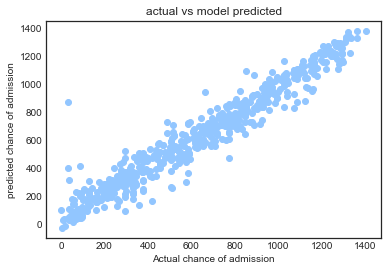

In [62]:
y_pred=regressor.predict(X_test)

plt.scatter(Y_test,fmod_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

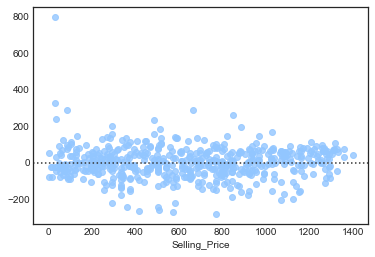

In [63]:
#residual plot
p = sns.residplot(Y_test,fmod_pred)

# Saving the model for deployment

In [65]:
import joblib

#Saving the best Regression ML model
filename = "FinalModel_Car_salePrice.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Car_salePrice.pkl']